In [ ]:
import re  # Regular Expression.Provides support for working with regular expressions
import nltk # Natural Language ToolKit.Platform for working with human language data
import pickle
import numpy as np
import pandas as pd # Library for working with structured data, such as tabular data in DataFrames
import seaborn as sns # Data visualization library that builds on top of Matplotlib.
from sklearn.svm import SVC # Import Support Vector Machine (SVM) classifier from scikit-learn
from wordcloud import WordCloud # Library for creating word clouds
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from collections import Counter
from nltk.corpus import stopwords # Stopwords module provides a list of common words (e.g., "and," "the," "is") that are often removed from text data during preprocessing
import plotly.graph_objects as go
from sklearn.naive_bayes import MultinomialNB # Import Multinomial Naive Bayes classifier from scikit-learn
from imblearn.over_sampling import RandomOverSampler
from sklearn.linear_model import LogisticRegression # Import Logistic Regression classifier from scikit-learn
from sklearn.model_selection import train_test_split # This module provides functions for splitting datasets into training and testing sets
from nltk.sentiment import SentimentIntensityAnalyzer # Import NLTK's Sentiment Intensity Analyzer, a tool for analyzing and scoring the sentiment (positive, negative, neutral) of text data
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix,f1_score
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer , TfidfVectorizer # CountVectorizer and TF-IDFVectorizer convert text into numerical vectors, and TfidfTransformer transforms existing vectors using TF-IDF (Term Frequency-Inverse Document Frequency) weighting


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
nltk.download('punkt')
nltk.download('vader_lexicon')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
!pip install lime

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 275.7/275.7 kB 5.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for lime: filename=lime-0.2.0.1-py3-none-any.whl size=283834 sha256=b7cb07c5ceb87bac613567f6ccde385bf1b8ea841f6f47cb69fe32c9d3a98378
  Stored in directory: /root/.cache/pip/wheels/fd/a2/af/9ac0a1a85a27f314a06b39e1f492bee1547d52549a4606ed89
Successfully built lime


In [ ]:
!pip install shap

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 532.9/532.9 kB 6.5 MB/s eta 0:00:00


In [ ]:
#Reading the given Dataset
df = pd.read_csv("/content/drive/MyDrive/spam.csv",encoding = 'latin1')
df

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN
...,...,...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,NaN,NaN,NaN
5568,ham,Will Ì_ b going to esplanade fr home?,NaN,NaN,NaN
5569,ham,"Pity, * was in mood for that. So...any other s...",NaN,NaN,NaN
5570,ham,The guy did some bitching but I acted like i'd...,NaN,NaN,NaN


In [ ]:
#Removing Unwanted columns
df = df.drop(['Unnamed: 2','Unnamed: 3','Unnamed: 4'],axis = 1)

In [ ]:
#Renaming columns
df.columns = ['Class' , 'Message']

In [ ]:
X = df['Message']
y = df['Class']

In [ ]:
oversampler = RandomOverSampler(sampling_strategy='auto', random_state=42)
X_resampled, y_resampled = oversampler.fit_resample(X.values.reshape(-1, 1), y)

In [ ]:
resampled_data = pd.DataFrame({'Message': X_resampled.squeeze(), 'Class': y_resampled})

In [ ]:
df = resampled_data

In [ ]:
#Collecting the stopwords
stop_words = set(stopwords.words('english'))

In [ ]:
# Define a function to preprocess text data
def preprocess_text(text):
    # Remove special characters and digits
    text = re.sub(r'[^a-zA-Z]', ' ', text)
    # Convert text to lowercase
    text = text.lower()
    # Tokenize the text
    words = text.split()
    # Remove stopwords
    words = [word for word in words if word not in set(stopwords.words('english'))]
    # Join the cleaned words back into a sentence
    cleaned_text = ' '.join(words)
    return cleaned_text

In [ ]:
# Create a copy of the DataFrame and modify it
df_1 = df.copy()
# Create a copy of the 'message' column to avoid SettingWithCopyWarning
df_1['Message'] = df_1['Message'].apply(lambda x: preprocess_text(x))

df = df_1

df

,Message,Class
0,go jurong point crazy available bugis n great ...,ham
1,ok lar joking wif u oni,ham
2,free entry wkly comp win fa cup final tkts st ...,spam
3,u dun say early hor u c already say,ham
4,nah think goes usf lives around though,ham
...,...,...
9645,free message thanks using auction subscription...,spam
9646,ur hmv quiz cash balance currently maximize ur...,spam
9647,rodger burns msg tried call reply sms free nok...,spam
9648,private account statement shows un redeemed po...,spam


In [ ]:
# Count the number of spam and ham messages
spam_count = df[df['Class'] == 'spam']['Class'].count()
ham_count = df[df['Class'] == 'ham']['Class'].count()

# Create labels and counts for the bar plot
labels = ['Ham', 'Spam']
counts = [ham_count, spam_count]

# Create a bar trace
bar_trace = go.Bar(
    x=labels,
    y=counts,
    text=counts,
    textposition='auto',
    marker=dict(color=['lightblue', 'lightcoral'])
)

# Create a layout
layout = go.Layout(
    title='Distribution of Spam and Ham Messages',
    xaxis=dict(title='Message Type'),
    yaxis=dict(title='Count')
)

# Create a figure
fig = go.Figure(data=[bar_trace], layout=layout)

# Show the graph (in a Jupyter Notebook, this will display the interactive graph)
fig.show()

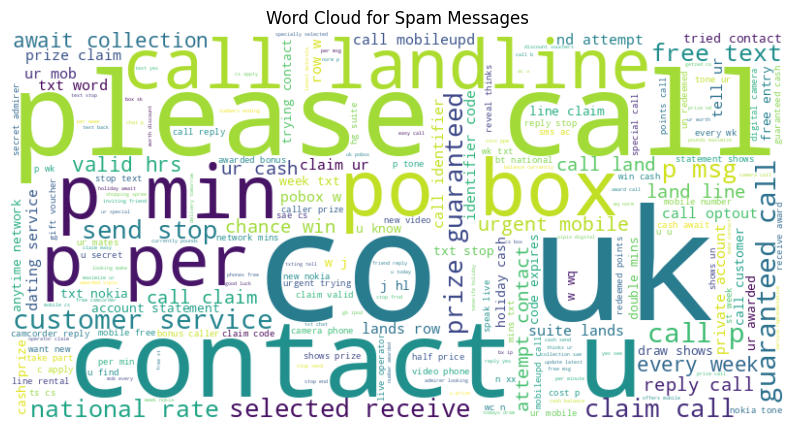

In [ ]:
# Filter out the spam messages
spam_messages = df[df['Class'] == 'spam']['Message']

# Join the spam messages into a single text
spam_text = " ".join(spam_messages)

# Generate a word cloud for spam messages
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(spam_text)

# Plot the word cloud
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title("Word Cloud for Spam Messages")
plt.show()

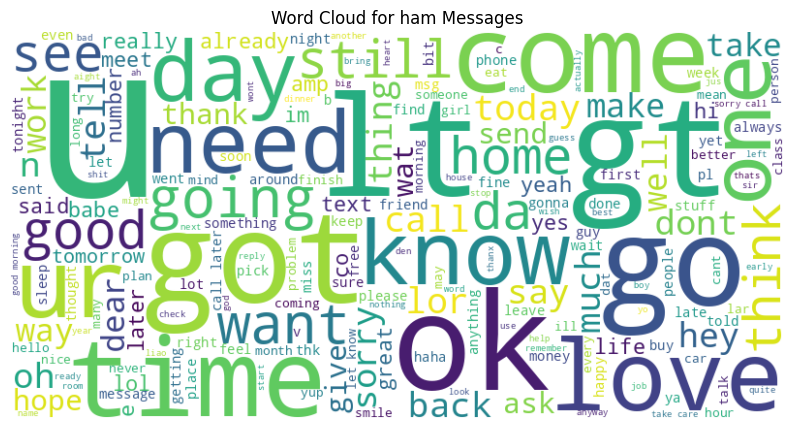

In [ ]:
# Filter out the ham messages
spam_messages = df[df['Class'] == 'ham']['Message']

# Join the ham messages into a single text
spam_text = " ".join(spam_messages)

# Generate a word cloud for ham messages
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(spam_text)

# Plot the word cloud
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title("Word Cloud for ham Messages")
plt.show()

In [ ]:
#sentimental Analysis
sia = SentimentIntensityAnalyzer()
emotion = []

for i in range(len(df)):
  emotion.append(sia.polarity_scores(df.iloc[i]['Message'])['compound'])

print(emotion)

[0.4019, 0.4767, 0.7964, 0.0, -0.1027, 0.8957, 0.7717, 0.4767, 0.9287, 0.8271, -0.3182, 0.6808, 0.8126, 0.8751, 0.0, 0.3818, 0.0, 0.4019, 0.2023, 0.1139, -0.1779, 0.6908, -0.1027, 0.0, 0.25, -0.8158, 0.6705, 0.6369, 0.0, 0.6486, 0.4939, 0.296, 0.0, -0.4939, 0.6486, 0.296, 0.0, 0.0, 0.0, 0.1531, 0.7717, 0.875, 0.836, 0.0, 0.9136, -0.296, 0.0, 0.3182, 0.5994, -0.9313, 0.0, 0.8271, 0.2023, 0.9274, -0.3182, 0.2732, 0.8703, -0.0772, 0.1027, 0.4019, -0.8271, 0.8834, 0.0, 0.2263, 0.2023, 0.936, 0.7269, 0.7506, 0.0, 0.0, 0.7184, 0.0, 0.0, 0.0, 0.0, 0.5106, 0.8689, 0.128, 0.2732, 0.0, -0.0772, 0.0, 0.296, 0.0, -0.296, 0.0, 0.0, -0.1531, 0.0, 0.5106, 0.296, -0.7269, 0.936, 0.6808, 0.0, 0.5106, 0.0, -0.1027, 0.5994, 0.3182, 0.34, 0.0, 0.4767, 0.5859, 0.7783, 0.8519, 0.0, 0.0, 0.6597, 0.3412, 0.0, 0.0, 0.5106, 0.5106, 0.7783, 0.7506, 0.7579, 0.4019, 0.0772, 0.5423, 0.8834, 0.0, 0.7003, 0.0, 0.0, 0.4404, 0.1083, 0.0, 0.6124, 0.0, 0.0, 0.4404, 0.0, 0.8316, 0.3182, 0.0, 0.0, 0.0, 0.5106, 0.4215, 0.0,

In [ ]:
#Creating a new column named Emotion
df['Emotion'] = emotion

In [ ]:
spam = []
ham = []

#Separating spam and ham emotion
for i in range(len(df)):
  if(df.iloc[i]['Class'] == 'spam'):
    spam.append(df.iloc[i]['Emotion'])
  else:
    ham.append(df.iloc[i]['Emotion'])

print(spam)
print(ham)

[0.7964, 0.8957, 0.9287, 0.8271, 0.6808, 0.8126, 0.3818, 0.1139, 0.6486, 0.836, -0.3182, 0.8703, 0.936, 0.7506, 0.0, 0.6808, 0.5106, 0.5106, 0.7579, 0.5423, 0.8834, 0.7003, 0.8316, 0.3182, 0.5106, 0.296, 0.3182, 0.7579, 0.4404, 0.0, 0.6249, 0.6808, 0.0, 0.0, 0.6486, 0.6808, 0.6705, 0.9485, 0.0, -0.3446, -0.296, 0.6249, 0.8885, 0.7506, -0.5106, 0.1027, 0.6486, 0.8271, 0.0772, 0.7579, 0.4019, 0.9485, 0.0, 0.5106, -0.5267, 0.2732, -0.1779, 0.765, 0.872, 0.0, 0.7964, 0.9217, 0.0, 0.7964, 0.5267, 0.8591, 0.7783, 0.8316, 0.296, 0.872, 0.8703, 0.7184, 0.5106, 0.0, 0.3612, 0.8834, 0.5574, 0.3182, 0.3182, -0.5267, 0.5106, 0.5106, 0.0772, 0.5106, 0.7003, 0.5423, 0.3182, 0.2023, 0.5106, -0.296, 0.5106, 0.8074, -0.2023, 0.3182, 0.5106, 0.0, 0.3182, 0.4404, 0.6369, 0.4767, 0.5574, 0.765, 0.0, 0.2023, 0.765, -0.2732, 0.5423, 0.4588, 0.0, 0.2023, 0.4019, 0.6486, 0.7579, 0.2023, 0.8316, 0.6249, 0.7783, 0.4404, 0.5106, 0.8442, 0.9485, 0.0, 0.5106, 0.8834, 0.7579, 0.128, 0.0772, 0.0, 0.5267, 0.6369, 0.5

In [ ]:
# Count positive and negative numbers in each list
spam_positive = sum(1 for num in spam if num > 0)
spam_negative = sum(1 for num in spam if num < 0)
ham_positive = sum(1 for num in ham if num > 0)
ham_negative = sum(1 for num in ham if num < 0)

# Create labels and sizes for the pie chart
labels = ['Positive', 'Negative']
sizes1 = [spam_positive, spam_negative]
sizes2 = [ham_positive, ham_negative]
colors = ['lightblue', 'lightcoral']

# Create labels and sizes for the pie chart
labels = ['Positive', 'Negative']
colors = ['lightblue', 'lightcoral']

# Create a Plotly figure
fig = go.Figure()

# Add the first pie chart for spam on the left
fig.add_trace(go.Pie(
    labels=labels,
    values=[spam_positive, spam_negative],
    textinfo='percent+label',
    marker=dict(colors=colors),
    domain=dict(x=[0, 0.45])
))

# Add the second pie chart for ham on the right
fig.add_trace(go.Pie(
    labels=labels,
    values=[ham_positive, ham_negative],
    textinfo='percent+label',
    marker=dict(colors=colors),
    domain=dict(x=[0.55, 1])  # Adjust the domain for the right pie chart
))

# Customize the layout
fig.update_layout(
    autosize=False,
    width=800,
    height=400,
)

# Add titles
fig.update_layout(
    title_text="Sentimental Analysis",
    title_x=0.5,  # Center the title
)

# Add subtitles
fig.add_annotation(
    text="Spam",
    x=0.225,  # Adjust the position as needed
    y=0.5,
    showarrow=False,
    font=dict(size=16),
)
fig.add_annotation(
    text="Ham",
    x=0.775,  # Adjust the position as needed
    y=0.5,
    showarrow=False,
    font=dict(size=16),
)

# Show the graph
fig.show()

In [ ]:
spam = []
ham = []

for i in range(len(df)):
    if df.iloc[i]['Class'] == 'spam':
        spam.append(df.iloc[i]['Message'])
    else:
        ham.append(df.iloc[i]['Message'])

# Combine both spam and ham messages into a single corpus
corpus = spam + ham

# Step 3: Create Bag of Words (BoW) representations for spam and ham
count_vectorizer = CountVectorizer()
bow_matrix = count_vectorizer.fit_transform(corpus)
print(bow_matrix)
# Step 4: Calculate TF-IDF for spam and ham
tfidf_transformer = TfidfTransformer()

# Calculate TF-IDF for spam
tfidf_matrix_spam = tfidf_transformer.fit_transform(bow_matrix[:len(spam)])

# Calculate TF-IDF for ham
tfidf_matrix_ham = tfidf_transformer.fit_transform(bow_matrix[len(spam):])

# Convert TF-IDF matrices to DataFrames (optional)
tfidf_spam = pd.DataFrame(tfidf_matrix_spam.toarray(), columns=count_vectorizer.get_feature_names_out())
tfidf_ham = pd.DataFrame(tfidf_matrix_ham.toarray(), columns=count_vectorizer.get_feature_names_out())


  (0, 2432)	1
  (0, 2025)	2
  (0, 7336)	1
  (0, 1260)	1
  (0, 7294)	1
  (0, 2161)	2
  (0, 1476)	1
  (0, 2282)	1
  (0, 6677)	1
  (0, 6146)	1
  (0, 3932)	1
  (0, 6543)	1
  (0, 5262)	1
  (0, 5157)	1
  (0, 6188)	1
  (0, 6861)	1
  (0, 5209)	1
  (0, 303)	1
  (1, 6188)	1
  (1, 2438)	1
  (1, 2892)	1
  (1, 1532)	1
  (1, 7214)	1
  (1, 7368)	1
  (1, 489)	1
  :	:
  (9645, 3022)	1
  (9645, 3592)	1
  (9646, 2629)	1
  (9646, 2947)	1
  (9646, 2419)	1
  (9646, 2056)	1
  (9647, 4132)	1
  (9647, 4823)	1
  (9647, 6325)	1
  (9648, 2432)	1
  (9648, 7214)	1
  (9648, 3635)	1
  (9648, 4331)	1
  (9648, 3201)	1
  (9648, 6984)	1
  (9648, 1968)	1
  (9648, 6005)	1
  (9648, 2540)	1
  (9648, 897)	1
  (9648, 2753)	1
  (9648, 59)	1
  (9648, 676)	1
  (9649, 4245)	1
  (9649, 6816)	1
  (9649, 5469)	1


In [ ]:
tfidf_spam

,aa,aah,aaniye,aaooooright,aathi,ab,abbey,abdomen,abeg,abel,...,zeros,zf,zhong,zindgi,zoe,zogtorius,zoom,zouk,zs,zyada
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4820,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4821,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4822,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4823,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
tfidf_ham

,aa,aah,aaniye,aaooooright,aathi,ab,abbey,abdomen,abeg,abel,...,zeros,zf,zhong,zindgi,zoe,zogtorius,zoom,zouk,zs,zyada
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4820,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4821,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4822,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4823,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
spam_words=list(tfidf_spam[:0])
ham_words=list(tfidf_ham[:0])
spam_dict={}
for i in range(len(tfidf_spam)):
  spam_dict[i+1]={}
  for j in spam_words:
    if tfidf_spam.iloc[i][j]!=0:
      spam_dict[i+1][j]=tfidf_spam.iloc[i][j]
spam_dict


In [ ]:
ham_dict={}
for i in range(len(tfidf_ham)):
  ham_dict[i+1]={}
  for j in ham_words:
    if tfidf_ham.iloc[i][j]!=0:
      ham_dict[i+1][j]=tfidf_ham.iloc[i][j]
ham_dict

In [ ]:
# Separate spam and ham messages
spam_messages = df[df['Class'] == 'spam']['Message']
ham_messages = df[df['Class'] == 'ham']['Message']

# Tokenize and count keywords in spam and ham messages
def get_common_keywords(messages):
    keyword_counts = Counter()
    for message in messages:
        words = message.split()
        keyword_counts.update(words)
    return keyword_counts

common_keywords_spam = get_common_keywords(spam_messages)
common_keywords_ham = get_common_keywords(ham_messages)

# Get the top 10 keywords and their counts
top_10_keywords_spam = common_keywords_spam.most_common(10)
top_10_keywords_ham = common_keywords_ham.most_common(10)

# Extract keywords and counts
keywords_spam, counts_spam = zip(*top_10_keywords_spam)
keywords_ham, counts_ham = zip(*top_10_keywords_ham)

# Create a Plotly figure for spam keywords
fig_spam = go.Figure(data=[go.Bar(x=keywords_spam,
                                  y=counts_spam,
                                  text=counts_spam,
                                  textposition='auto',  # Show text on bars
                                  marker_color='lightcoral')])
fig_spam.update_layout(title='Top 10 Keywords in Spam Messages')
fig_spam.show()

# Create a Plotly figure for ham keywords
fig_ham = go.Figure(data=[go.Bar(x=keywords_ham,
                                y=counts_ham,
                                text=counts_ham,
                                textposition='auto',  # Show text on bars
                                marker_color='lightblue')])
fig_ham.update_layout(title='Top 10 Keywords in Ham Messages')
fig_ham.show()

In [ ]:
def naive_bayes_classifier(x , y):
  # Split the data into training and testing sets
  X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

  # Create a Naive Bayes classifier (MultinomialNB)
  naive_bayes_classifier = MultinomialNB()

  # Train the classifier on the training data
  nb_model = naive_bayes_classifier.fit(X_train, y_train)

  # Make predictions on the test data
  y_pred = naive_bayes_classifier.predict(X_test)

  # Evaluate the classifier
  accuracy = accuracy_score(y_test, y_pred)
  f1=f1_score(label_encoder.fit_transform(y_test),label_encoder.fit_transform(y_pred))
  classification_rep = classification_report(y_test, y_pred)

  print(f"Accuracy: {accuracy}")
  print("f1_score: ",f1)
  print("\nClassification Report:\n", classification_rep)

  return nb_model , accuracy ,f1, confusion_matrix(y_test, y_pred)

tfidf_vectorizer = TfidfVectorizer()
X_NB = tfidf_vectorizer.fit_transform(df['Message'])
Y_NB = df['Class']

NB_model,Accuracy_NB , f1_NB, Confusion_NB = naive_bayes_classifier(X_NB , Y_NB)


x=["Verify your bank account,call now"]
input_data = pd.DataFrame(x,columns=['Message'])

input_data_spam = tfidf_vectorizer.transform(input_data['Message'])

pre = NB_model.predict(input_data_spam)
print(pre[0])

Accuracy: 0.977720207253886
f1_score:  0.9774278215223097

Classification Report:
               precision    recall  f1-score   support

         ham       0.99      0.97      0.98       985
        spam       0.97      0.99      0.98       945

    accuracy                           0.98      1930
   macro avg       0.98      0.98      0.98      1930
weighted avg       0.98      0.98      0.98      1930

spam


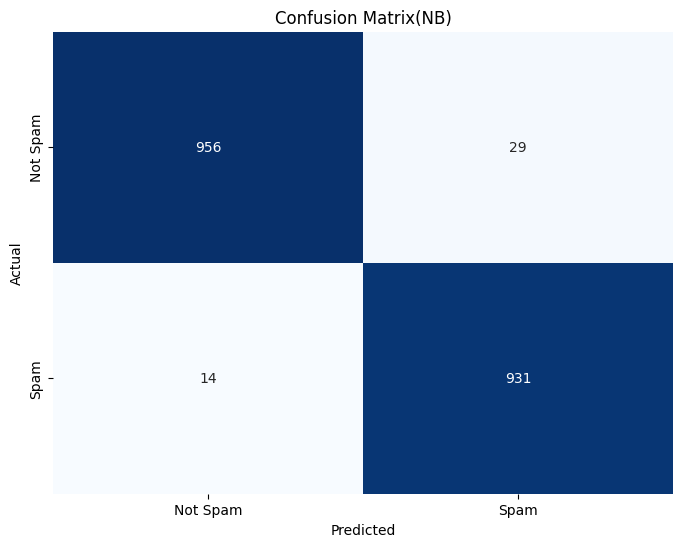

In [ ]:
# Display the confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(Confusion_NB, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Not Spam', 'Spam'], yticklabels=['Not Spam', 'Spam'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix(NB)')
plt.show()

In [ ]:
models_dict = {
    "nb":NB_model
}

# Specify the filename for the pickle file
pickle_file_name = "models.pkl"

# Save the dictionary of models to the pickle file
with open(pickle_file_name, 'wb') as pickle_file:
    pickle.dump(models_dict, pickle_file)

In [ ]:
vector_dict = {
    "Vector" : tfidf_vectorizer
}

# Specify the filename for the pickle file
pickle_file_name = "vectors.pkl"

# Save the dictionary of models to the pickle file
with open(pickle_file_name, 'wb') as pickle_file:
    pickle.dump(vector_dict, pickle_file)


In [ ]:
X = df['Message']
y = df['Class']

tfidf_vectorizer = TfidfVectorizer(max_features=5000)
X_tfidf = tfidf_vectorizer.fit_transform(X)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_tfidf, y, test_size=0.2, random_state=42)

# Train a logistic regression model
logistic_model = LogisticRegression()
logistic_model.fit(X_train, y_train)

# Initialize the LIME explainer
explainer = LimeTextExplainer(class_names=['ham', 'spam'])

y_test.reset_index(drop=True, inplace=True)

# Select a random instance for explanation
# Select a random instance for explanation
random_instance_index = np.random.randint(X_test.shape[0])
text_instance = X_test[random_instance_index]
true_label = y_test[random_instance_index]

# Convert the sparse matrix to a dense array and then to a string
text_instance = " ".join(tfidf_vectorizer.get_feature_names_out()[text_instance.indices])

# Wrap the string in a list to match LIME's expected input format
text_instance = [text_instance]

# Create a function to predict probabilities for a list of text instances
def predict_proba(text_instances):
    # Transform the text instances using the TF-IDF vectorizer
    text_instances_tfidf = tfidf_vectorizer.transform(text_instances)
    # Predict probabilities using the logistic regression model
    probabilities = logistic_model.predict_proba(text_instances_tfidf)
    return probabilities

# Generate an explanation for the prediction
explanation = explainer.explain_instance(text_instance[0], predict_proba, num_features=10)

# Print the explanation
explanation.show_in_notebook()



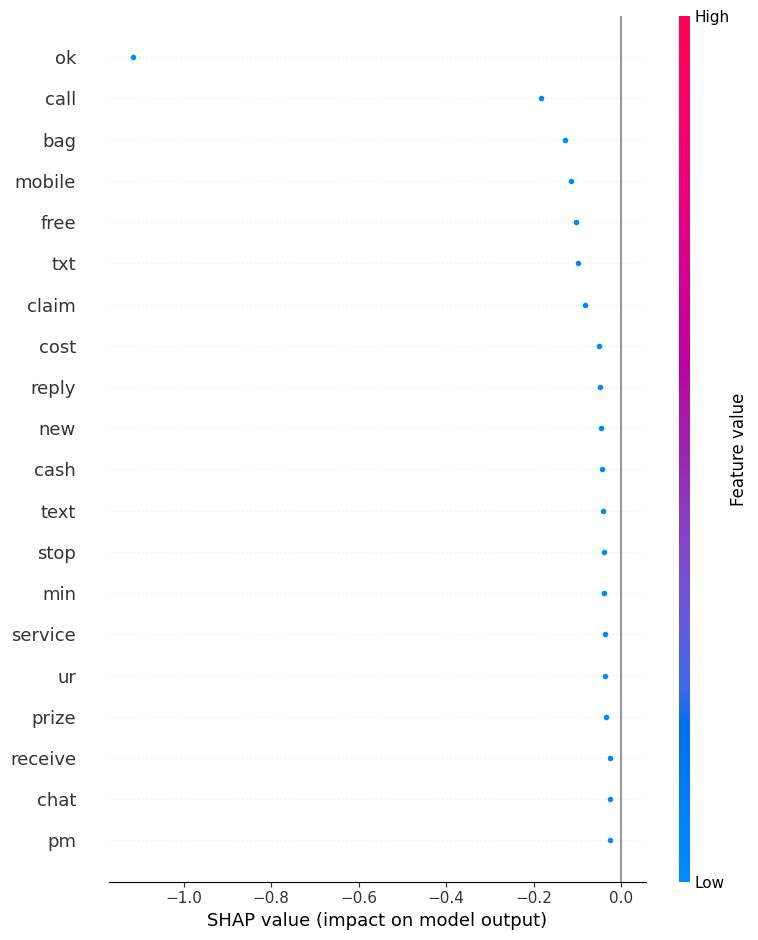

In [ ]:
X = df['Message']
y = df['Class']

tfidf_vectorizer = TfidfVectorizer(max_features=5000)
X_tfidf = tfidf_vectorizer.fit_transform(X)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_tfidf, y, test_size=0.2, random_state=42)

# Train a logistic regression model
logistic_model = LogisticRegression()
logistic_model.fit(X_train, y_train)

# Create a SHAP explainer for the logistic regression model
explainer = shap.Explainer(logistic_model, X_train)

# Convert the specific instance (e.g., the first instance in the test set) to a dense numpy array
instance_to_explain = X_test[0].toarray()

# Calculate SHAP values for the instance
shap_values = explainer.shap_values(instance_to_explain)

# Plot the SHAP values
shap.summary_plot(shap_values, instance_to_explain, feature_names=tfidf_vectorizer.get_feature_names_out())
